<a href="https://colab.research.google.com/github/jonathan-salazar/Wildlife-Conservation-Project/blob/main/Collab_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feline Classification 

 We are planning to build a identification and classification model for feline images that will act as the input for our model

In [1]:
# Importing initial dependencies
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import files
uploaded = files.upload()
# Reading our main dataset
data = pd.read_csv("organized.csv")

data.head()

Saving organized.csv to organized.csv


,gbifID,identifier,format,taxonID,scientificName,kingdom,phylum,class,order,family,genus,verbatimScientificName,iucnRedListCategory
0,3344144760,https://inaturalist-open-data.s3.amazonaws.com...,image/jpeg,41976,"Lynx rufus (Schreber, 1777)",Animalia,Chordata,Mammalia,Carnivora,Felidae,Lynx,Lynx rufus,LC
1,3344144760,https://inaturalist-open-data.s3.amazonaws.com...,image/jpeg,41976,"Lynx rufus (Schreber, 1777)",Animalia,Chordata,Mammalia,Carnivora,Felidae,Lynx,Lynx rufus,LC
2,3344144760,https://inaturalist-open-data.s3.amazonaws.com...,image/jpeg,41976,"Lynx rufus (Schreber, 1777)",Animalia,Chordata,Mammalia,Carnivora,Felidae,Lynx,Lynx rufus,LC
3,3344133318,https://inaturalist-open-data.s3.amazonaws.com...,image/jpeg,41976,"Lynx rufus (Schreber, 1777)",Animalia,Chordata,Mammalia,Carnivora,Felidae,Lynx,Lynx rufus,LC
4,3344133318,https://inaturalist-open-data.s3.amazonaws.com...,image/jpeg,41976,"Lynx rufus (Schreber, 1777)",Animalia,Chordata,Mammalia,Carnivora,Felidae,Lynx,Lynx rufus,LC


In [10]:
# Importing libraries into our notebook to display images in the notebook
from PIL import Image
import requests
from io import BytesIO

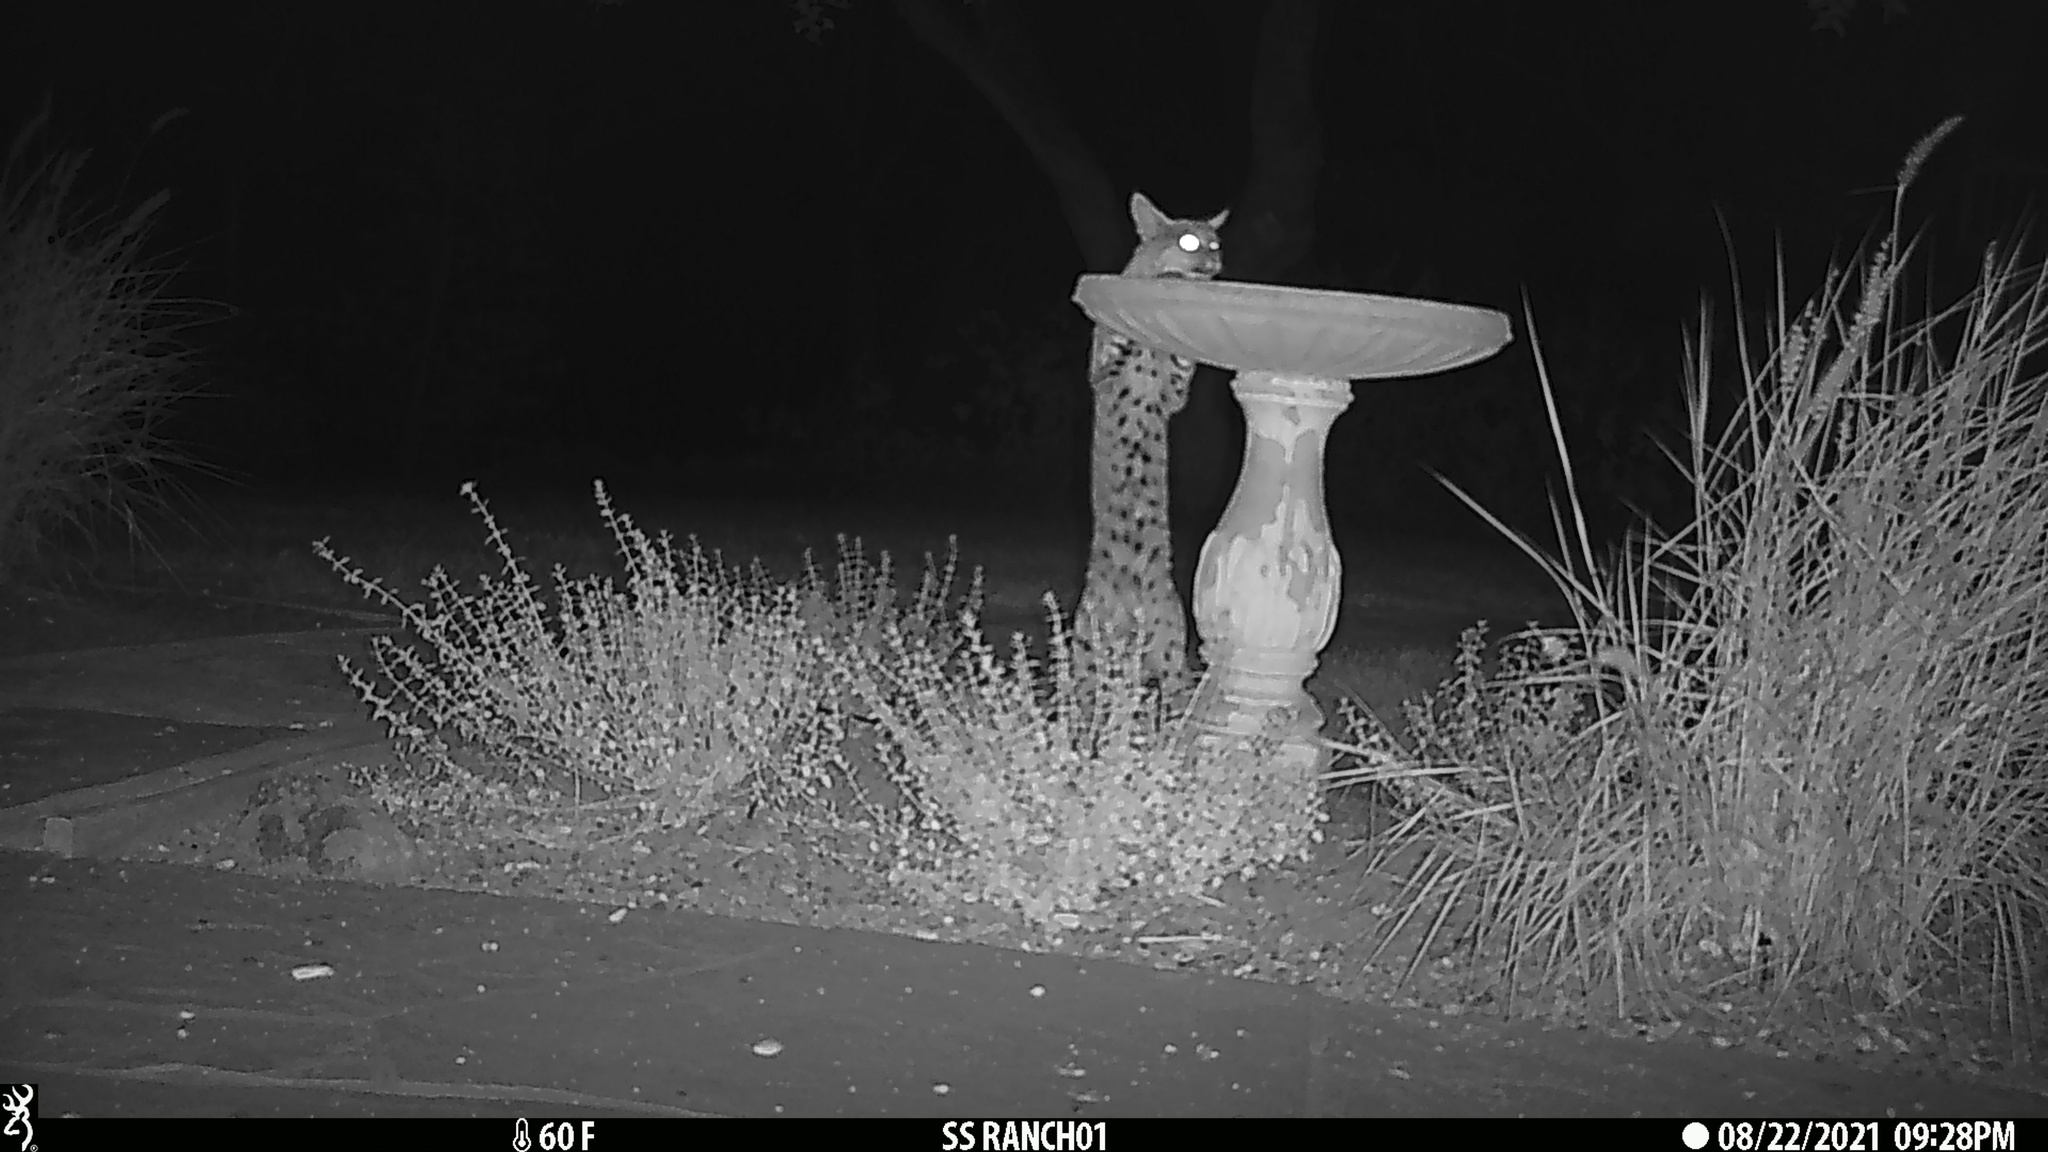

In [11]:
# Extracting a url from the csv created with all feline images
response = requests.get(data["identifier"][10])
img = Image.open(BytesIO(response.content))
img

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import requests

urls = []
names = []
buckets = []
counter = 0

for index, i in data.iterrows():
  urls.append(i[1])
  name = i[11].replace(" ", "_")
  buckets.append(name)
  names.append(f"{name}+{counter}")
  counter += 1

cats_df = pd.DataFrame({'urls': urls,
           'names': names})

In [51]:
cats_df

,urls,names
0,https://inaturalist-open-data.s3.amazonaws.com...,Lynx_rufus+0
1,https://inaturalist-open-data.s3.amazonaws.com...,Lynx_rufus+1
2,https://inaturalist-open-data.s3.amazonaws.com...,Lynx_rufus+2
3,https://inaturalist-open-data.s3.amazonaws.com...,Lynx_rufus+3
4,https://inaturalist-open-data.s3.amazonaws.com...,Lynx_rufus+4
...,...,...
27366,https://inaturalist-open-data.s3.amazonaws.com...,Puma_concolor+27366
27367,https://inaturalist-open-data.s3.amazonaws.com...,Puma_concolor+27367
27368,https://inaturalist-open-data.s3.amazonaws.com...,Lynx_rufus+27368
27369,https://inaturalist-open-data.s3.amazonaws.com...,Puma_concolor+27369


In [84]:
buckets = list(set(buckets))
path = Path('all_cats')

In [85]:
if not path.exists():
  path.mkdir()
  for o in buckets:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    o_cats_df = cats_df[cats_df['names'].str.contains(o)]
    for index, row in o_cats_df.iterrows():
      file_name = str(row[1]) + '.jpg'
      img_path = f"{dest}/{file_name}"
      print(img_path)
      response = requests.get(row[0])
      file = open(img_path, "wb")
      file.write(response.content)
      file.close()

test4_cats/Felis_margarita/Felis_margarita+13623.jpg
test4_cats/Felis_margarita/Felis_margarita+18675.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+35.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+36.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+37.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+47.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+2663.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+2667.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+2749.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+3642.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+3659.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+3728.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+3769.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+3770.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+3795.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus+3805.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus_hecki+4389.jpg
test4_cats/Acinonyx_jubatus/Acinonyx_jubatus_hecki+4390.jpg
test4_cats/Acinonyx_jubatu

KeyboardInterrupt: ignored

In [6]:
from fastai.vision import *